### Q2. A tropical cyclone is a rotating, organized system of clouds and thunderstorms that originates over tropical or subtropical waters and has a closed low-level circulation. As quoted by WMO (World Meteorological Organization):

### _Tropical Cyclone (TC) are one of the biggest threats to life and property even in the formative stages of their development. They include a number of different hazards that can individually cause significant impacts on life and property, such as storm surge, flooding, extreme winds, tornadoes and lighting._

### Mexico (MX) is located between Atlantics and East Pacific. Every year, MX suffers from TCs and the financial and societal losses resulting from them. 

### Your company is hired by the United Nations to undertake a project quantifying the potential impact TCs to MX. In this project, your tasks are to analyse TCs and MX's rainfall monitoring network. Specifically,


#### 2.1. (40%) Characterising the rain gauge network covered the entire MX.
#### 2.2. (5%) Analysing historical records of TC tracks for the period 1979 - 2019
#### 2.3. (30%) Identifying those _hotspot_ states prone to be impacted by TCs passing by 'East Pacific' Ocean, and calculate rainfall sums of a given state for a given TC event.

In [1]:
# You may import essential modules here
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### 2.1. (40%) Characterising the rain gauge network covered the entire MX.

#### 2.1.1 (2%) Import _MX_RG_Stns_xy.csv_ file for the name, ID, coordinates (X and Y in metres) of all gauge stations, as well as the States and Cities these stations belonging to. 

#### *Hint: pandas by default would make ID column 'integer type', but it is better if you convert it into 'string type'. This conversion will make your following analyses easier.

In [2]:
# You may import the CSV file here
# define filename
fn_locs = './Data/MX_RG_Stns_xy.csv'

# read csv file, a dataframe will be created to store data
df = pd.read_csv(fn_locs, dtype={'ID': str})
df.head()

,ID,StationName,Y,X,State,City,Elevation
0,00001001,AGUASCALIENTES (OBS),2.470087e+06,1.092654e+06,AGUASCALIENTES,AGUASCALIENTES,1890.8
1,00001003,CALVILLO (SMN),2.426080e+06,1.096451e+06,AGUASCALIENTES,CALVILLO,1640.0
2,00001004,CAÑADA HONDA,2.479567e+06,1.109225e+06,AGUASCALIENTES,AGUASCALIENTES,1925.0
3,00001005,PRESA EL NIAGARA,2.461754e+06,1.084992e+06,AGUASCALIENTES,AGUASCALIENTES,1844.0
4,00001006,EL TULE (SMN),2.490617e+06,1.118118e+06,AGUASCALIENTES,ASIENTOS,1960.0


#### 2.1.2 (3%) Please calculate and print out how many gauges there are in this network?

In [3]:
df2 = df.groupby(['ID'])['ID'].count()
gauges_num = len(df2)
print(f'There have {gauges_num} gauges in this network.')

There have 5467 gauges in this network.


#### 2.1.3 (5%) Please calculate and print out how many states and cities are minitored by this gauge network?

#### Hint: Some cities from different States may have the same names

In [4]:
# Number of states & cities
states = df.groupby(['State'])['ID'].count()
num_states = len(states)
cities = df.groupby(['State','City'])['ID'].count()
num_cities = len(cities)
# cities.to_csv('cities.csv', index=True)
print(f'There have {num_states} states and {num_cities} cities are monitored by this gauge network.')

There have 32 states and 1699 cities are monitored by this gauge network.


In [5]:
# create a dataframe which is defined by states
states_c = states.copy()
states_c = states_c.to_frame()
states_c.rename(columns={'ID': 'number'}, inplace=True)

#### 2.1.4 (5%) Please make a _horizontal bar_ chart summarising the the number of gauges in each state, where the y-axis is the name of each state and the bar width represents the number of gauges. 

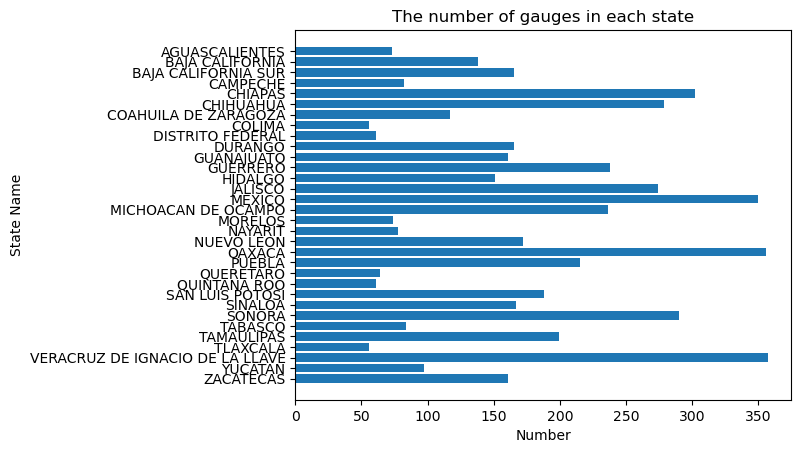

In [6]:
# You may do the counts here and make the plot.
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(states_c.index,states_c['number'])
ax.set_yticks(states_c.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number')
ax.set_ylabel('State Name')
ax.set_title('The number of gauges in each state')

plt.show()

#### 2.1.5 (5%) What is the average number of gauges in each state, and which state has the highest number of gauges and how many gauges are there? 

In [7]:
avg_num = states_c.mean(axis=0)
avg_num = list(avg_num)
highest_num = states_c.loc[states_c['number'].idxmax()]
print(f'The average number of gauges in each state is {avg_num[0]}.')
print('The highest number of gauges :')
print(f'{highest_num}')

The average number of gauges in each state is 170.84375.
The highest number of gauges :
number    357
Name: VERACRUZ DE IGNACIO DE LA LLAVE, dtype: int64


#### 2.1.6 (10%) What is the maximum, minimum and average distances (in km) between any two gauges in the state with the highest number of gauges?

#### Hints:

1. _scipy.spatial.distance.cdist_ method may be used here to help with distance calculation (See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html)

2. _cdist_ method will output a matrix of distances between each pair of gauges

2. _numpy.triu_indices_ method may be used to extract distances without repetitions (see: https://numpy.org/doc/stable/reference/generated/numpy.triu_indices.html and https://stackoverflow.com/questions/47314754/how-to-get-triangle-upper-matrix-without-the-diagonal-using-numpy)

In [8]:
from scipy.spatial import distance
max_g = df['State'] == 'VERACRUZ DE IGNACIO DE LA LLAVE'
# print(max_g)
# get the row of corresponding state
df_highest = df[max_g]
df_highest

,ID,StationName,Y,X,State,City,Elevation
4852,00030001,ACAYUCAN,3.249644e+06,680475.400092,VERACRUZ DE IGNACIO DE LA LLAVE,ACAYUCAN,93.0
4853,00030002,ACAZONICA (CFE),3.067497e+06,812470.170199,VERACRUZ DE IGNACIO DE LA LLAVE,PASO DE OVEJAS,339.0
4854,00030003,ACTOPAN,3.063848e+06,844397.297842,VERACRUZ DE IGNACIO DE LA LLAVE,ACTOPAN,250.0
4855,00030004,ACULTZINGO,2.993764e+06,755080.266573,VERACRUZ DE IGNACIO DE LA LLAVE,ACULTZINGO,1701.0
4856,00030005,AGUA DULCE,3.329953e+06,706192.423915,VERACRUZ DE IGNACIO DE LA LLAVE,AGUA DULCE,19.0
...,...,...,...,...,...,...,...
5204,00030468,PASO DEL TORO,3.115767e+06,795031.634247,VERACRUZ DE IGNACIO DE LA LLAVE,MEDELLIN,10.0
5205,00030469,BANDERILLA,3.028471e+06,852771.697909,VERACRUZ DE IGNACIO DE LA LLAVE,BANDERILLA,1532.0
5206,00030486,LOMA GRANDE,3.000933e+06,778770.659856,VERACRUZ DE IGNACIO DE LA LLAVE,MARIANO ESCOBEDO,2040.0
5207,00030487,MESA DE GOMEZ,3.025543e+06,845920.465463,VERACRUZ DE IGNACIO DE LA LLAVE,TLALNELHUAYOCAN,1440.0


In [9]:
pos_samples = np.array((df_highest['X']/1000, df_highest['Y']/1000)).T # turn m to km
Y = distance.cdist(pos_samples, pos_samples, 'euclidean') # create a matrix
# print(type(Y),Y)

# Compute value
minval = np.min(Y[np.nonzero(Y)])
maxval = np.max(Y[np.nonzero(Y)])
avgval = np.average(Y[np.nonzero(Y)])
# Return maximum element
print(f'Maximum distances between two gauges is {maxval} km.')
# print(f'Maximum distances between two gauges is {maxval:.4f} km.')
# Return minimum element
print(f'Minimum distances between two gauges is {minval} km.')
# Return average element
print(f'Average distances between two gauges is {avgval} km.')
print(Y.shape)

Maximum distances between two gauges is 714.9738825601839 km.
Minimum distances between two gauges is 0.23256784754125154 km.
Average distances between two gauges is 218.08381538890927 km.
(357, 357)


#### 2.1.7 (10%) Please find a suitable probability distribution to fit distances between any two gauges in the state with the highest number of gauges, and plot the histogram of the these distances and the fitted probability distribution in a single plot to confirm your fitting result. Please note that you have to:

##### a. Use Knuth's method to derive the suitable number of bins for the histogram plot. 
##### b. You have to make a judgement about which probability distribution to be used and perform a visual inspection to confirm your judgement.

#### *Knuth's method: https://arxiv.org/abs/physics/0605197

In [10]:
# a. Use Knuth's method to derive the suitable number of bins for the histogram plot.
from scipy import special as sp
from scipy.stats import gamma
import math
# Y[np.nonzero(Y)].shape # check the shape
y = np.triu(Y) # get the upper triangle of an array, and set 0 to downward array
y_nonzero = y[np.nonzero(y)] # without zero value
print(y.shape)
y_nonzero.shape

(357, 357)


(63546,)

In [11]:
# Kunth's method
def opt_hist_bins_Knuth(samples, maxBins):
    """
    This function is an implementation of Knuth's work that derived the optimal number of bins 
    for a histogram based upon data and Bayesian inference.
    :param samples: array with size (1, N)
    :param maxBins: int
    :return optBins: int
    """
    if len(samples.shape) > 1:
        print("The dimensions of input data must be (1, N)!")
        return
    
    N = samples.shape[0]
    logp = np.zeros([maxBins, ])

    for b in range(1, maxBins):
        hist, bin_edge = np.histogram(samples, b)
        part1 = N*math.log(b) + sp.loggamma(b/2) - sp.loggamma(N+b/2)
        part2 = -b*sp.loggamma(1/2) + np.sum(sp.loggamma(hist+np.array([0.5]*len(hist))))
        logp[b] = part1 + part2
    
    optBins = np.where(logp==np.max(logp))
    
    return optBins[0][0]

In [12]:
opt_bins = opt_hist_bins_Knuth(y_nonzero, 100)
print(f'The suitable number of bins is {opt_bins}.')

The suitable number of bins is 56.


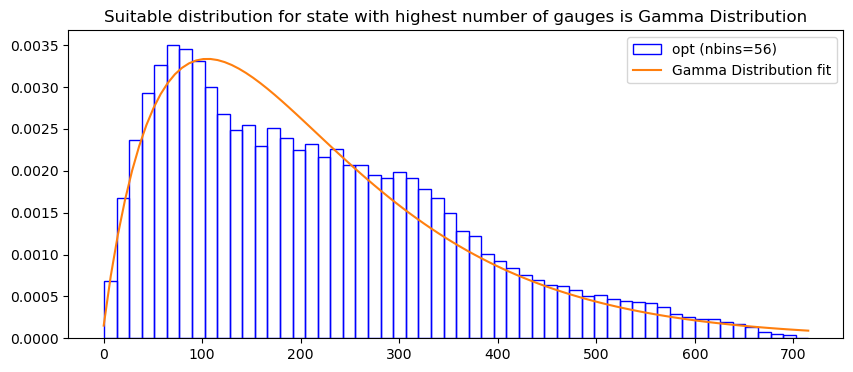

In [13]:
# b. plot the histogram of the these distances and the fitted probability distribution in a single plot 
result = gamma.fit(y_nonzero)
# print(result)
fig = plt.figure(figsize=(10, 4))

x = np.linspace(0, 714.97, 100)
y = gamma.pdf(x, result[0], result[1], result[2]) 

# plot
plt.hist(y_nonzero, bins = opt_bins, density = True, fill = False, edgecolor='blue', label = f'opt (nbins={opt_bins})')
plt.plot(x, y, label='Gamma Distribution fit')
plt.legend()
plt.title('Suitable distribution for state with highest number of gauges is Gamma Distribution')
plt.show()

#### 2.2. (5%) Analysing historical records of TC tracks for the period 1979 - 2019

#### 2.2.1 (2%) Import _NHC_TC_1979-2019_(0_34,-120_-55)_xy.csv_ file for records of TC tracks passing by Atlantic and East Pacific oceans. Each row of the file represents a track, and you can find:

##### - the 'order' of this track; 
##### - Which 'Ocean' this track come from?
##### - The registered 'Datetime' of this track;
##### - The 'name' and 'Record identifier' of the TC that this track belonged to;
##### - The registered 'X' and 'Y' coordinates (in metres);
##### - Some physical properties: Max sustained wind speed (kt)	and Min pressure (millibars)

In [14]:
# define filename
fn_locs = './Data/NHC_TC_1979-2019_(0_34,-120_-55)_xy.csv'

# read csv file, a dataframe will be created to store data
df_TC = pd.read_csv(fn_locs)
df_TC.head()

,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
0,34794,Atlantic,AL011979,11/06/1979 12:00,UNNAMED,4.713328e+06,762965.651712,20,-999
1,34795,Atlantic,AL011979,11/06/1979 18:00,UNNAMED,4.739978e+06,800466.013308,25,-999
2,34796,Atlantic,AL011979,12/06/1979 00:00,UNNAMED,4.796193e+06,853699.561234,25,-999
3,34797,Atlantic,AL011979,12/06/1979 06:00,UNNAMED,4.822453e+06,891305.530643,25,-999
4,34798,Atlantic,AL011979,12/06/1979 12:00,UNNAMED,4.843414e+06,961673.788237,25,-999


In [15]:
# change the class of 'Datetime'
df_TC['Datetime'] = pd.to_datetime(df_TC['Datetime'], format='%d/%m/%Y %H:%M')
print(type(df_TC['Datetime'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 2.2.2 (3%) Please count the number of TCs passing by 'Atlantic' ocean each year between 1979 and 2019, and make a plot visualising these counts, where the y-axis is the 'count' and x-axis is 'year'. 

In [16]:
atlantic = df_TC['Ocean'] == 'Atlantic'
# get the row of corresponding state
df_atlantic = df_TC[atlantic]
print(type(df_atlantic['Datetime'][0]))
df_atlantic.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
0,34794,Atlantic,AL011979,1979-06-11 12:00:00,UNNAMED,4.713328e+06,762965.651712,20,-999
1,34795,Atlantic,AL011979,1979-06-11 18:00:00,UNNAMED,4.739978e+06,800466.013308,25,-999
2,34796,Atlantic,AL011979,1979-06-12 00:00:00,UNNAMED,4.796193e+06,853699.561234,25,-999
3,34797,Atlantic,AL011979,1979-06-12 06:00:00,UNNAMED,4.822453e+06,891305.530643,25,-999
4,34798,Atlantic,AL011979,1979-06-12 12:00:00,UNNAMED,4.843414e+06,961673.788237,25,-999


In [17]:
# Number of states & cities
tc_count = df_atlantic.groupby(df_atlantic.Datetime.dt.year)['order'].count()
print(type(tc_count))
tc_count_c = tc_count.copy()
tc_count_c = tc_count_c.to_frame()
tc_count_c.rename(columns={'order': 'count'}, inplace=True)
tc_count_c

<class 'pandas.core.series.Series'>


,count
Datetime,
1979,336
1980,203
1981,248
1982,91
1983,77
...,...
2015,103
2016,301
2017,303


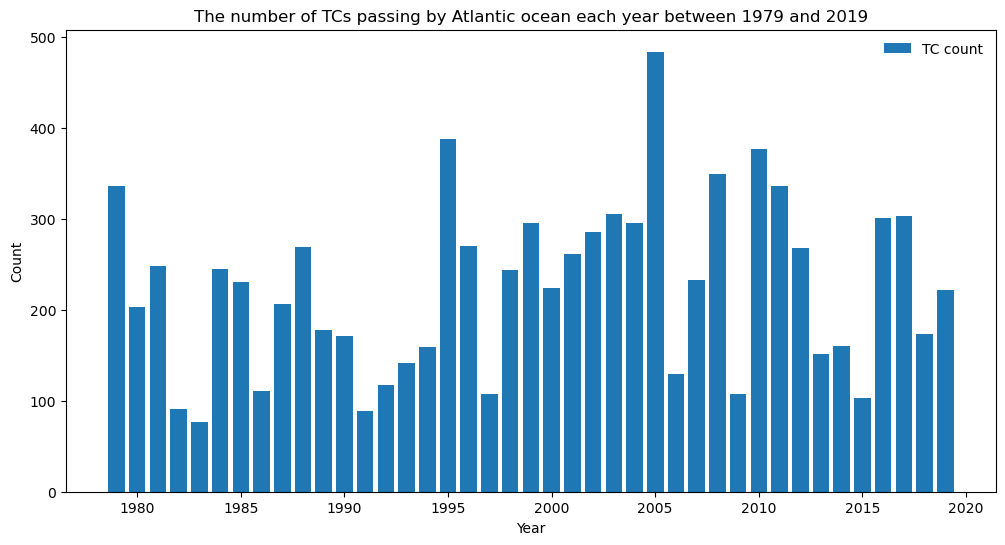

In [18]:
# visualization
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
# ax.plot(tc_count_c['count'], label='TC count', color='blue')
ax.bar(tc_count_c.index,tc_count_c.loc[:,'count'],label = 'TC count')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('The number of TCs passing by Atlantic ocean each year between 1979 and 2019')
plt.legend(frameon=False, loc='upper right')
plt.show()

#### 2.3. (30%) Identifying those _hotspot_ states prone to be impacted by TCs passing by 'East Pacific' Ocean, and calculate rainfall sums of a given state for a given TC event.

#### 2.3.1 (2%) Identify those TC tracks passing by 'East Pacific'

In [19]:
eastern_pac = df_TC['Ocean'] == 'Eastern pacific'
# get the row of corresponding state
df_east = df_TC[eastern_pac]
df_east.head()

,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
9252,7777,Eastern pacific,EP011979,1979-05-31 18:00:00,ANDRES,3.222902e+06,-96022.348908,25,-999
9253,7778,Eastern pacific,EP011979,1979-06-01 00:00:00,ANDRES,3.145096e+06,-99360.806490,30,-999
9254,7779,Eastern pacific,EP011979,1979-06-01 06:00:00,ANDRES,3.067274e+06,-102319.471709,30,-999
9255,7780,Eastern pacific,EP011979,1979-06-01 12:00:00,ANDRES,2.988404e+06,-71150.925130,30,-999
9256,7781,Eastern pacific,EP011979,1979-06-01 18:00:00,ANDRES,2.942449e+06,-16279.988755,30,-999


#### 2.3.2 (8%) Calculate the 'minimum' distance between each TC and each gauges in MX, and export the calculation result to a csv file named _tc-tracks_MX-station_distance_min.csv_. 

#### The format of the csv file is as follow:


TC_ID,00001001,00001003,00001004,00001005,00001006...

EP011979,min_distance,min_distance,min_distance,min_distance,...

EP021979,min_distance,min_distance,min_distance,min_distance,...

...

In [20]:
# get the index of 'Record Identifier'
cy = df_east.groupby(['Record identifier']).count() 
cy.index[0]
cy_test = df_east['Record identifier'] == cy.index[0]
df_cy = df_east[cy_test]
df_cy

,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
18877,25285,Eastern pacific,CP032013,2013-08-09 06:00:00,THREE,922776.933891,-34262.229200,20,1008
18878,25286,Eastern pacific,CP032013,2013-08-09 12:00:00,THREE,925002.295423,-11859.642046,20,1007
18879,25287,Eastern pacific,CP032013,2013-08-09 18:00:00,THREE,861002.088508,17245.274538,20,1007
18880,25288,Eastern pacific,CP032013,2013-08-10 00:00:00,THREE,797216.109092,46592.128364,20,1007
18881,25289,Eastern pacific,CP032013,2013-08-10 06:00:00,THREE,725166.721614,99724.421284,25,1008
18882,25290,Eastern pacific,CP032013,2013-08-10 12:00:00,THREE,686413.032966,149295.422614,25,1008
18883,25291,Eastern pacific,CP032013,2013-08-10 18:00:00,THREE,658824.006610,197615.100801,25,1008
18884,25292,Eastern pacific,CP032013,2013-08-11 00:00:00,THREE,596093.414720,227668.611034,25,1008


In [32]:
cy = df_east.groupby(['Record identifier']).count()
df_min_d = pd.DataFrame(index=cy.index, columns = np.array(df['ID']))
# dist = []

# for k in range(0, len(df)):
for k in range(0, len(df)):
    pos_station = [(df.loc[k,'Y']/1000, df.loc[k,'X']/1000)]
    for i in range(0,len(cy)):
        cy_test = df_east['Record identifier'] == cy.index[i]
        df_cy = df_east[cy_test]
        pos_cyclone = np.array((df_cy.loc[:,'Y']/1000, df_cy.loc[:,'X']/1000)).T # turn m to km
        dist = distance.cdist(pos_cyclone, pos_station, 'euclidean') # create a matrix
        # Compute value
        min_d = np.min(dist)
#         dist[i].append(min_d)
        df_min_d.iloc[[i],[k]] = min_d

In [34]:
df_min_d
# Export data
# fn_data_out = './Data/tc-tracks_MX-station_distance_min.csv'
# df_min_d.to_csv(fn_data_out, float_format='%.6f') # 小數點至第四位

In [35]:
df_min_d

,00001001,00001003,00001004,00001005,00001006,00001007,00001008,00001009,00001010,00001011,...,00032180,00032181,00032182,00032183,00032184,00032186,00032187,00032188,00032189,00032191
Record identifier,,,,,,,,,,,,,,,,,,,,,
CP032013,1899.273097,1865.900673,1916.63795,1888.037988,1930.802661,1902.013721,1935.038856,1873.096699,1898.030102,1868.905541,...,1838.58208,1818.70476,1814.88197,1800.666211,1815.188243,1973.777989,2018.747147,1967.4682,1834.125904,1964.349498
EP011979,361.05581,344.718521,380.146161,350.273542,393.400275,369.165318,402.741195,353.691515,379.853152,344.616924,...,336.916432,299.258002,292.557462,315.098083,312.217714,452.998776,477.923218,421.354801,371.251316,564.147802
EP011980,1720.823635,1699.161064,1739.837263,1709.771162,1753.457163,1727.824721,1761.86116,1707.787951,1734.332022,1700.136951,...,1683.004285,1651.350968,1645.536385,1651.885779,1657.623257,1810.100338,1839.165672,1782.752572,1699.650427,1870.701969
EP011981,819.286557,850.399752,826.463305,818.607415,826.90665,832.371388,840.29804,855.336894,863.209925,844.744336,...,880.298377,845.42169,839.655441,896.924655,872.977566,877.190631,838.115019,810.543069,940.501464,1089.991728
EP011982,680.052812,683.726295,697.002713,672.150822,706.494955,692.222313,719.552684,692.332559,714.330092,680.986133,...,691.667227,649.393064,641.951699,682.909384,670.950087,771.836583,770.858306,717.875111,740.266494,932.768647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EP242018,318.918471,285.397155,315.129301,318.231229,318.295616,306.521348,306.798307,280.693004,275.651349,291.0986,...,256.762347,295.055396,301.695334,248.101743,268.120223,288.548129,347.759,346.367978,197.051843,117.141404
EP251992,1375.255929,1363.96314,1394.107373,1365.157745,1406.358694,1384.898947,1417.237637,1372.993031,1398.72418,1363.34177,...,1357.520313,1319.553111,1312.714012,1334.215873,1332.743419,1469.141141,1484.782352,1428.273628,1388.857874,1577.703237
EP252018,523.541614,499.157382,542.311398,512.305127,556.238728,529.494101,563.63996,507.654793,534.169085,500.446862,...,480.99853,451.096147,445.498466,448.438812,455.789229,610.432961,643.607463,588.320677,495.687244,661.253122


In [21]:
print(len(cy))
print(cy.index[2])
cy.head()

653
EP011980


,order,Ocean,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
Record identifier,,,,,,,,
CP032013,8,8,8,8,8,8,8,8
EP011979,17,17,17,17,17,17,17,17
EP011980,14,14,14,14,14,14,14,14
EP011981,19,19,19,19,19,19,19,19
EP011982,39,39,39,39,39,39,39,39


In [22]:
# # pos_station = np.array((df.loc[0,'Y']/1000, df.loc[0,'X']/1000)).T # turn m to km
# pos_station = [(df.loc[0,'Y']/1000, df.loc[0,'X']/1000)]
# pos_cyclone = np.array((df_cy.loc[:,'Y']/1000, df_cy.loc[:,'X']/1000)).T # turn m to km
# pos_cyclone
# dist = distance.cdist(pos_cyclone, pos_station, 'euclidean') # create a matrix
# print(type(dist),dist)

# # # Compute value
# min_d = np.min(dist)
# min_d
# # maxval = np.max(Y[np.nonzero(Y)])
# # avgval = np.average(Y[np.nonzero(Y)])

<class 'numpy.ndarray'> [[1914.18645824]
 [1899.27309654]
 [1935.37060733]
 [1973.00372741]
 [2007.64967678]
 [2017.77589155]
 [2020.33898163]
 [2063.98959816]]


1899.273096541143

#### 2.3.3 (10%) For each TC, please find the closest gauge (that is, the gauge with the shorest 'minimum' distance to a given TC) and identify the corresponding State this gauge belonging to. Finally, please count the number of  the closest gauges for all TCs passing by 'East Pacific' ocean for each State and export the counts to a csv filen named _tc-rg-counts_ep_MX.csv_.

#### The format of the output csv is as follow:

State,Count

BAJA CALIFORNIA,8

BAJA CALIFORNIA SUR,65

...

In [24]:
# You may import the CSV file here
# define filename
fn_locs = './Data/tc-tracks_MX-station_distance_min.csv'

# read csv file, a dataframe will be created to store data
df_min_dist = pd.read_csv(fn_locs)
# df_min_dist.set_index(df_min_dist['Record identifier'], inplace = True)
df_min_dist.head()
len(df_min_dist)

653

In [25]:
# Create dataframe
df_cy_state = pd.DataFrame(index=df_min_dist['Record identifier'], columns = np.arange(1))
df_cy_state.columns = ['State']

for i in range(0, len(df_min_dist)):
    row = df_min_dist.iloc[i][1:]
    col_idx = (df_min_dist.loc[i] == row.min())
#     col_idx.index[col_idx.argmax()]
    ID = df['ID'] == col_idx.index[col_idx.argmax()]
    df_T = df[ID]
    df_T.State.item()
    df_cy_state.iloc[i][0] = df_T.State.item()

df_cy_state.head()

,State
Record identifier,
CP032013,COLIMA
EP011979,COLIMA
EP011980,COLIMA
EP011981,OAXACA
EP011982,GUERRERO


In [26]:
df_cy_id_test = df_cy_state.groupby(['State'])['State'].count()
df_cy_id_test = df_cy_id_test.to_frame()
df_cy_id_test.columns = ['Count']
df_cy_id_test

,Count
State,
BAJA CALIFORNIA,8
BAJA CALIFORNIA SUR,65
CHIAPAS,12
CHIHUAHUA,1
COAHUILA DE ZARAGOZA,1
...,...
NAYARIT,7
OAXACA,30
SINALOA,14


In [27]:
# Export data
# fn_data_out = './Data/tc-rg-counts_ep_MX.csv.csv'
# df_cy_id_test.to_csv(fn_data_out)

#### 2.3.4 (10%) From the counts, you shall be able to find that one of the hotspot states is named 'SINALOA'. Please 

##### a. Import rainfall data for those gauges belonging to 'SINALOA' state only from the _MX_SAT-RG_data.csv_ file;
##### b. Calculate rainfall sum for these gauges for a TC event passing by 'East Pacific' Ocean, named 'JULIETTE' (the Record identifier is EP112001). 
##### c. Output the average, maximum and minimum rainfall sums for TC 'JULIETTE' from these gauges.

In [28]:
sinaloa = df['State'] == 'SINALOA'
df_sinaloa = df[sinaloa]
df_sinaloa.head()

,ID,StationName,Y,X,State,City,Elevation
4056,00025001,ACATITAN,2.028163e+06,1.347808e+06,SINALOA,SAN IGNACIO,96.0
4057,00025002,AGUA CALIENTE,1.869600e+06,1.652099e+06,SINALOA,CHOIX,211.0
4058,00025003,AHOME,1.785041e+06,1.558778e+06,SINALOA,AHOME,10.0
4059,00025004,ANGOSTURA (ESDA),1.882359e+06,1.487782e+06,SINALOA,ANGOSTURA,19.0
4060,00025005,BACUBIRITO,1.909814e+06,1.540908e+06,SINALOA,SINALOA,174.0


In [29]:
jul = df_east['Record identifier'] == 'EP112001'
df_cy_jul = df_east[jul]
df_cy_jul

,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
15723,19458,Eastern pacific,EP112001,2001-09-21 06:00:00,JULIETTE,3.697857e+06,1.128036e+05,30,1007
15724,19459,Eastern pacific,EP112001,2001-09-21 12:00:00,JULIETTE,3.508445e+06,1.443892e+05,35,1005
15725,19460,Eastern pacific,EP112001,2001-09-21 18:00:00,JULIETTE,3.341199e+06,1.905079e+05,35,997
15726,19461,Eastern pacific,EP112001,2001-09-22 00:00:00,JULIETTE,3.176961e+06,1.937235e+05,40,996
15727,19462,Eastern pacific,EP112001,2001-09-22 06:00:00,JULIETTE,3.013248e+06,1.874993e+05,45,996
...,...,...,...,...,...,...,...,...,...
15766,19501,Eastern pacific,EP112001,2001-10-02 00:00:00,JULIETTE,1.413274e+06,2.079380e+06,30,1006
15767,19502,Eastern pacific,EP112001,2001-10-02 06:00:00,JULIETTE,1.386280e+06,2.103827e+06,30,1006
15768,19503,Eastern pacific,EP112001,2001-10-02 12:00:00,JULIETTE,1.366207e+06,2.094321e+06,30,1006
15769,19504,Eastern pacific,EP112001,2001-10-02 18:00:00,JULIETTE,1.307738e+06,2.088119e+06,30,1007


In [30]:
# You may import the CSV file here
# define filename
fn_locs = './Data/MX_SAT-RG_data.csv'

# read csv file, a dataframe will be created to store data
df_rain = pd.read_csv(fn_locs, usecols=df_sinaloa['ID'])
date = pd.read_csv(fn_locs, usecols=['date'])
result = pd.concat([date, df_rain], axis=1)
result
# change the class of 'Datetime'
result['date'] = pd.to_datetime(result['date'], format='%Y/%m/%d')
print(type(result['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [31]:
# result['date'] == date_series
df_date = result[(result['date'] < '2001-10-04') & (result['date'] > '2001-09-20')]
df_rain_new = df_date.drop(columns=['date'])
df_rain_new

,00025001,00025002,00025003,00025004,00025005,00025006,00025007,00025008,00025009,00025010,...,00025180,00025181,00025183,00025184,00025185,00025186,00025188,00025190,00025191,00025192
477,0.000000,0.091283,0.005326,0.000399,0.096716,0.153400,0.002692,0.003055,0.024508,0.246468,...,0.108201,0.000442,0.000014,0.124774,0.005526,0.002373,1.727468,8.279153,0.011796,0.005010
478,0.296264,16.290012,7.005647,1.024772,20.077869,3.504448,5.554143,1.526929,31.880262,3.292886,...,9.898837,19.340023,4.588486,23.118942,7.236288,40.321915,27.574482,29.806782,44.256378,86.649643
479,4.013972,0.000000,0.000000,0.001031,0.349120,0.079828,0.002173,0.004914,0.009606,0.114620,...,0.037790,5.040577,0.341469,0.496494,0.000000,0.010665,0.067497,0.000000,0.786946,0.890780
480,0.000000,0.000000,0.000000,0.150661,0.000000,0.000000,0.000000,0.012362,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.941381,0.000000,0.000000,0.065707,0.149863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.075675,12.791576,34.337173,59.449966,23.527618,17.848455,21.793634,39.607574,40.380882,6.571790,...,51.206215,0.641084,1.207735,24.624510,34.585484,0.453550,23.615440,15.620772,1.162621,1.139171
486,0.000001,24.263092,41.506065,1.621467,1.930105,1.802737,37.194557,24.082817,65.544205,0.056353,...,11.029082,0.000000,0.010458,2.012982,40.603088,0.046006,1.040306,3.056337,0.001997,0.003622
487,0.000000,0.514983,0.101581,0.000307,1.531506,0.000000,4.970853,0.058275,3.941052,0.000000,...,13.181592,0.000000,0.000000,2.231349,0.175656,0.000000,0.533996,0.004138,0.000000,0.000000
488,6.857800,0.000000,0.000000,0.000000,0.000000,0.000205,0.000000,0.000000,0.000000,0.014787,...,0.000000,16.035259,0.013857,0.000000,0.000000,1.582616,0.036117,0.005603,1.965864,6.181685


In [32]:
sum_column = df_rain_new.sum(axis=0)
max_rain = np.max(sum_column)
min_rain = np.min(sum_column)
avg_rain = np.average(sum_column)
print(f'Minimum rainfall sum : {min_rain}')
print(f'Average rainfall sum : {avg_rain}')
print(f'Maximum rainfall sum : {max_rain}')

Minimum rainfall sum : 34.908902
Average rainfall sum : 94.59972491017965
Maximum rainfall sum : 266.08198600000003
